<h3>1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.</h3>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt

In [4]:
data = pd.DataFrame({
    "6-А Бег (сек.)":[33, 45, 43, 29, 50, 41, 39],
    "6-Б Бег (сек.)":[28, 34, 25, 43, 56, 38, 42]
})

n = data.shape[0]

data

,6-А Бег (сек.),6-Б Бег (сек.)
0,33,28
1,45,34
2,43,25
3,29,43
4,50,56
5,41,38
6,39,42


<h3>2. Побудувати графік, що відображає розкид даних в групах. Приклад:</h3>

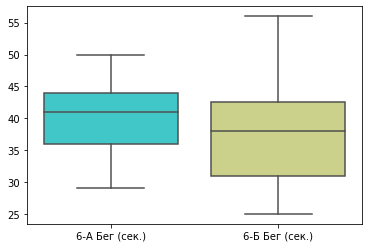

In [5]:
sns.boxplot(data=data, palette='rainbow')

<h3>3. Написати функції:

для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).</h3>

In [6]:
def liven(data):
    Md1 = sum(data.iloc[:, 0])/n
    Md2 = sum(data.iloc[:, 1])/n
    sum_1 = 0
    sum_2 = 0
    for i in range(n):
        sum_1 += (data.iloc[i, 0] - Md1)**2
    for i in range(n):
        sum_2 += (data.iloc[i, 1] - Md2)**2
    sigma_1 = sqrt(sum_1/n)
    sigma_2 = sqrt(sum_2/n)
    
    if sigma_1 > sigma_2:
        F = sigma_1**2/sigma_2**2
    else:
        F = sigma_2**2/sigma_1**2
    df = n-1
    
    c = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx").iloc[df, df]
    
    znach = ""
    if F > c:
        print("Not significant: "+ str(F)+"(дано)" + " > "+ str(c)+"(табличне)")
        znach = "not significant"
    else:
        print("Significant: "+ str(F)+"(дано)" + " < "+ str(c)+"(табличне)")
        znach = "significant"
    
    ans = [F, znach]
    return ans

<h3>4. для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</h3>

In [7]:
def t_crit(data):
    Md1 = sum(data.iloc[:, 0])/n
    Md2 = sum(data.iloc[:, 1])/n
    sum_1 = 0
    sum_2 = 0
    for i in range(n):
        sum_1 += (data.iloc[i, 0] - Md1)**2
    for i in range(n):
        sum_2 += (data.iloc[i, 1] - Md2)**2
    sigma_1 = sqrt(sum_1/n)
    sigma_2 = sqrt(sum_2/n)
    
    
    if sigma_1 == sigma_2:
        t = (abs(Md1-Md2))/(sqrt((sigma_1**2/n)+(sigma_2**2/n)))
    else:
        t = (abs(Md1-Md2))/sqrt((((n-1)*sigma_1**2+(n-2)*sigma_2**2)/(n+n-2))*((1/n)+(1/n)))
    
    df = n-1
    
    c = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df-1, 1]
    znach = ""
    if t > c:
        print("Not significant: "+ str(t)+"(дано)" + " > "+ str(c)+"(табличне)")
        znach = "not significant"
    else:
        print("Significant: "+ str(t)+"(дано)" + " < "+ str(c)+"(табличне)")
        znach = "significant"
    
    ans = [t, df, znach]
    return ans

<h3>5. Перевірити розбіжність на між групами на даних з п. 1.</h3>

In [8]:
liven(data)
print("------------------------------")
t_crit(data)

Significant: 2.1241830065359473(дано) < 4.28(табличне)
------------------------------
Significant: 0.4808564910677262(дано) < 2.447(табличне)


[0.4808564910677262, 6, 'significant']